# funcao apply, normalizacao de dados e juncao de dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# apply - funcao usada ao longo de um datafrme
# apply - aplicar em cada item - resumindo

df = pd.DataFrame ([[4,9,2]] * 4, columns=["A",'B','C'])
df

,A,B,C
0,4,9,2
1,4,9,2
2,4,9,2
3,4,9,2


In [3]:
# sqrt - para raiz quadrada
raizQuadrada = df.apply(np.sqrt)

soma_linha = df.apply(np.sum, axis=1)
soma_coluna = df.apply(np.sum, axis=0)


raizQuadrada

,A,B,C
0,2.0,3.0,1.414214
1,2.0,3.0,1.414214
2,2.0,3.0,1.414214
3,2.0,3.0,1.414214


In [4]:
# funcao apply com lambda

df['D'] = df["C"].apply(lambda x: x*5)
df


,A,B,C,D
0,4,9,2,10
1,4,9,2,10
2,4,9,2,10
3,4,9,2,10


In [5]:
# somar coluna e linhas

resultado = df.apply(lambda row: row["A"] + row["B"], axis=1)
resultado

0    13
1    13
2    13
3    13
dtype: int64

In [6]:
# calcular a media, mediana, min e max

df = pd.DataFrame ({
    'A': [6,5,8,11],
    'B': [23,20,5,30]
})
df

,A,B
0,6,23
1,5,20
2,8,5
3,11,30


In [7]:
resultadoMedia_A = df["A"].apply(lambda x: x).mean()
resultadoMedia_A

7.5

In [8]:
resultadoMedia_B = df["B"].apply(lambda x: x).mean()
resultadoMedia_B

19.5

In [9]:
df_nomes = pd.DataFrame ({
    'nome': ['joao','ana','joao','pedro']
})


df_nomes['nome'] = df_nomes['nome'].apply(lambda x: x+' silva')
df_nomes

,nome
0,joao silva
1,ana silva
2,joao silva
3,pedro silva


In [10]:
dados = pd.read_csv('./manutencao_preditiva.csv')
dados

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [11]:
dados['Soma de temps'] = dados.apply(lambda linha: linha['Temperatura Ar [K]'] + linha['Temperatura Processo [K]'], axis=1)

dados

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha,Soma de temps
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,606.7
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,606.9
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,606.6
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,606.8
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,606.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,607.2
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,607.3
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,607.6
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,607.7


In [12]:
# 1- somar as variaveis de temperatura do ar e do processo, trazendo um uma nova variavel
# 2 - soma das temperaturas do ar e do processo apenas da maquina tipo M
# 3- media, mediana,min e max, quadno houver apenas maquinas do tipo H

In [13]:
df_tipo_m = dados[dados['Tipo'] == 'M']
df_tipo_m

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha,Soma de temps
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,606.7
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure,606.7
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure,607.0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure,607.5
12,13,M14872,M,298.6,309.1,1339,51.1,34,0,No Failure,607.7
...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,M24849,M,298.8,308.5,1577,33.2,0,0,No Failure,607.3
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0,No Failure,607.3
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,607.2
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,607.6


In [14]:
df_tipo_m['Temp do tipo M'] = df_tipo_m.apply(lambda linha: linha['Temperatura Ar [K]'] + linha['Temperatura Processo [K]'], axis=1)

df_tipo_m

C:\Users\Platinum\AppData\Local\Temp\ipykernel_24856\788255617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tipo_m['Temp do tipo M'] = df_tipo_m.apply(lambda linha: linha['Temperatura Ar [K]'] + linha['Temperatura Processo [K]'], axis=1)


,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha,Soma de temps,Temp do tipo M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,606.7,606.7
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure,606.7,606.7
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure,607.0,607.0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure,607.5,607.5
12,13,M14872,M,298.6,309.1,1339,51.1,34,0,No Failure,607.7,607.7
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,M24849,M,298.8,308.5,1577,33.2,0,0,No Failure,607.3,607.3
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0,No Failure,607.3,607.3
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,607.2,607.2
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,607.6,607.6


In [15]:
df_tipo_H = dados[dados['Tipo'] == 'H']
df_tipo_H

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha,Soma de temps
10,11,H29424,H,298.4,308.9,1782,23.9,24,0,No Failure,607.3
11,12,H29425,H,298.6,309.1,1423,44.3,29,0,No Failure,607.7
18,19,H29432,H,298.8,309.2,1306,54.5,50,0,No Failure,608.0
20,21,H29434,H,298.9,309.3,1375,42.7,58,0,No Failure,608.2
27,28,H29441,H,299.1,309.4,1811,24.6,77,0,No Failure,608.5
...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,H39392,H,298.6,308.3,1377,52.1,181,0,No Failure,606.9
9984,9985,H39398,H,298.7,308.4,1432,42.8,197,0,No Failure,607.1
9985,9986,H39399,H,298.7,308.5,1572,35.6,202,0,No Failure,607.2
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,607.3


In [16]:
resultado_maximo_H = df_tipo_H.apply(lambda x: x).max()
print(resultado_maximo_H)

UDI                                       9999
ID Produto                              H39412
Tipo                                         H
Temperatura Ar [K]                       304.2
Temperatura Processo [K]                 313.5
Velocidade Rotacao [rpm]                  2636
Torque [Nm]                               72.8
Desgaste Ferramenta [min]                  246
Alvo                                         1
Tipo da Falha                Tool Wear Failure
Soma de temps                            617.7
dtype: object


In [17]:
resultado_minimo_H = df_tipo_H.apply(lambda x: x).min()
print(resultado_minimo_H)

UDI                                                11
ID Produto                                     H29424
Tipo                                                H
Temperatura Ar [K]                              295.5
Temperatura Processo [K]                        305.9
Velocidade Rotacao [rpm]                         1212
Torque [Nm]                                      12.8
Desgaste Ferramenta [min]                           0
Alvo                                                0
Tipo da Falha                Heat Dissipation Failure
Soma de temps                                   601.4
dtype: object


In [18]:
resultado_media_H = df_tipo_H['Temperatura Ar [K]'].apply(lambda x: x).mean()
print(resultado_media_H)


299.866999002991


In [19]:
resultado_mediana_H = df_tipo_H['Temperatura Ar [K]'].apply(lambda x: x).median()
print(resultado_maximo_H)

UDI                                       9999
ID Produto                              H39412
Tipo                                         H
Temperatura Ar [K]                       304.2
Temperatura Processo [K]                 313.5
Velocidade Rotacao [rpm]                  2636
Torque [Nm]                               72.8
Desgaste Ferramenta [min]                  246
Alvo                                         1
Tipo da Falha                Tool Wear Failure
Soma de temps                            617.7
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

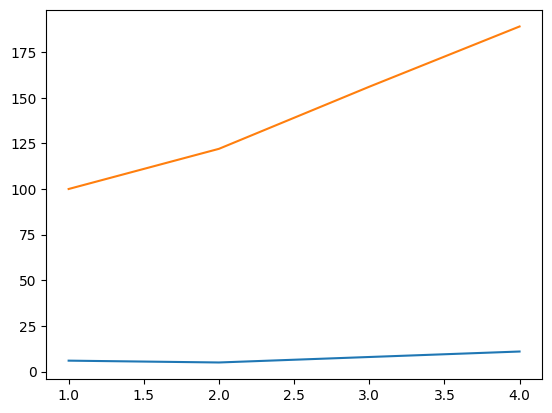

In [20]:
df_samble = pd.DataFrame({
    "A": [6,5,8,11],
    "B": [100,122,156,189],
    "indice": [1,2,3,4],
})

x = df_samble['indice']
y1 = df_samble['A']
y2 = df_samble['B']

plt.plot(x,y1,x,y2)
plt.show

In [21]:
df_normalizado = df_samble.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_normalizado

,A,B,indice
0,0.166667,0.000000,0.000000
1,0.000000,0.247191,0.333333
2,0.500000,0.629213,0.666667
3,1.000000,1.000000,1.000000


In [22]:
# fazer a normalizacao apenas para a variavel de rpm

bb = dados[['Velocidade Rotacao [rpm]']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
bb


,Velocidade Rotacao [rpm]
0,0.222934
1,0.139697
2,0.192084
3,0.154249
4,0.139697
...,...
9995,0.253783
9996,0.270081
9997,0.277648
9998,0.139697


In [23]:
# aplicar apply para verificar comprimento de dados (string)

df = pd.DataFrame({
    'texto': ['ola','mundo','python','pandas']
})

df['comprimento'] = df['texto'].apply(lambda texto: len(texto))
df

,texto,comprimento
0,ola,3
1,mundo,5
2,python,6
3,pandas,6


In [24]:
# condicao para inserir uma coluna chamada Comprimento_texto e se o comprimeto for maior que 5, insira longa, se na curta

df['Comprimento_texto'] = df['texto'].apply(lambda texto: 'curto' if len(texto) <= 5 else 'longo')
df

,texto,comprimento,Comprimento_texto
0,ola,3,curto
1,mundo,5,curto
2,python,6,longo
3,pandas,6,longo


In [25]:
# verificar o comprimento do textona coluna falhas. E mostra uma nova coluna que fala curso (menor ou igual a 10), medio (de 10 a 15) e longo (maior que 15)

dados['Contagem falhas'] = dados['Tipo da Falha'].apply(lambda texto: 'curto' if len(texto) <= 10  else 'medio' if 10 < len(texto) <= 15 else 'longo' )
dados['Contagem falhas'].value_counts()

Contagem falhas
curto    9652
longo     235
medio     113
Name: count, dtype: int64

In [26]:
# utilizando groupby do pandas

df_new = pd.DataFrame({
    "var_1": ['A', 'A', 'B', 'A', 'C', 'C', 'A', 'B', 'A', 'B'],
    "var_2": [100, 122, 156, 189, 50, 63, 9, 15, 78, 10],
    "var_3": [12, 18, 15, 19, 5, 62, 93, 145, 7, 10]
})
df_new



,var_1,var_2,var_3
0,A,100,12
1,A,122,18
2,B,156,15
3,A,189,19
4,C,50,5
5,C,63,62
6,A,9,93
7,B,15,145
8,A,78,7
9,B,10,10


In [27]:
agrupado = df_new.groupby('var_1').mean()
agrupado

,var_2,var_3
var_1,,
A,99.600000,29.800000
B,60.333333,56.666667
C,56.500000,33.500000


In [28]:
agrupado_media = df_new.groupby('var_1').mean().reset_index()
agrupado_media

,var_1,var_2,var_3
0,A,99.600000,29.800000
1,B,60.333333,56.666667
2,C,56.500000,33.500000


In [29]:
agrupado_mediana = df_new.groupby('var_1').median().reset_index()
agrupado_mediana

,var_1,var_2,var_3
0,A,100.0,18.0
1,B,15.0,15.0
2,C,56.5,33.5


In [30]:
agrupado_max = df_new.groupby('var_1').max().reset_index()
agrupado_max

,var_1,var_2,var_3
0,A,189,93
1,B,156,145
2,C,63,62


In [31]:
agrupado_min = df_new.groupby('var_1').min().reset_index()
agrupado_min

,var_1,var_2,var_3
0,A,9,7
1,B,10,10
2,C,50,5


In [32]:
# 1- agrupar os tipos de maquina e retoenar a media das colunas numericas

# 2- agrupar os dados por tipo de maquina e por tipo de falha, trazendo a media


In [33]:
dados.columns

Index(['UDI', 'ID Produto', 'Tipo', 'Temperatura Ar [K]',
       'Temperatura Processo [K]', 'Velocidade Rotacao [rpm]', 'Torque [Nm]',
       'Desgaste Ferramenta [min]', 'Alvo', 'Tipo da Falha', 'Soma de temps',
       'Contagem falhas'],
      dtype='object')

In [34]:
df_filtardo = dados[['Tipo', 'Temperatura Ar [K]', 'Temperatura Processo [K]', 'Velocidade Rotacao [rpm]', 'Torque [Nm]','Desgaste Ferramenta [min]', 'Alvo']]
df_filtardo

,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [35]:
maquinas = df_filtardo.groupby('Tipo').mean().reset_index()
maquinas

,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo
0,H,299.866999,309.925723,1538.147557,39.838285,107.419741,0.020937
1,L,300.015833,310.012300,1539.469167,39.996600,108.378833,0.039167
2,M,300.029263,310.018785,1537.598932,40.017251,107.272272,0.027694


In [36]:
df_neew = pd.DataFrame({
    "var_1": ['A', 'A', 'B', 'A', 'C', 'C', 'A', 'B', 'A', 'B'],
    "var_2": ['X', 'Y', 'Y', 'X', 'Y', 'X', 'Z', 'Y', 'X', 'Z'],
    "var_3": [12, 18, 15, 19, 5, 62, 93, 145, 7, 10]
})

df_neew

,var_1,var_2,var_3
0,A,X,12
1,A,Y,18
2,B,Y,15
3,A,X,19
4,C,Y,5
5,C,X,62
6,A,Z,93
7,B,Y,145
8,A,X,7
9,B,Z,10


In [37]:
grouped = df_neew.groupby(['var_1', 'var_2']).mean().reset_index()
grouped

,var_1,var_2,var_3
0,A,X,12.666667
1,A,Y,18.000000
2,A,Z,93.000000
3,B,Y,80.000000
4,B,Z,10.000000
5,C,X,62.000000
6,C,Y,5.000000
